In [ ]:
import os
import pandas as pd
#import pandas_profiling
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### datasets
- pdb_data_seq.csv : https://drive.google.com/file/d/1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P/view?usp=share_link
- pdb_data_no_dups.csv : https://drive.google.com/file/d/1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf/view?usp=share_link





In [ ]:
#線上直接下載到colab環境
#[安裝]gdown套件:
!pip install --upgrade --no-cache-dir gdown

!gdown -q https://drive.google.com/u/1/uc?id=1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P&export=download
!gdown -q https://drive.google.com/u/1/uc?id=1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf&export=download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


### 資料前處理&EDA

In [ ]:
# Import Dataset
df_dup = pd.read_csv('pdb_data_no_dups.csv')
df_seq = pd.read_csv('pdb_data_seq.csv')

len(df_dup), len(df_seq)

(141401, 467304)

In [ ]:
# Merge the two Data set together
df_merge = pd.read_csv('pdb_data_no_dups.csv').merge(pd.read_csv('pdb_data_seq.csv'), how='inner', on='structureId')
# Drop rows with missing labels
df_merge = df_merge[[type(c) == type('') for c in df_merge.classification.values]]
df_merge = df_merge[[type(c) == type('') for c in df_merge.sequence.values]]
df_merge.reset_index()
df_merge.shape

(471117, 18)

In [ ]:
# Merge the two Data set together
#df_merge = df_dup.merge(df_tmp ,how='inner',on='structureId')
df_merge.rename({'macromoleculeType_x':'macromoleculeType',
          'residueCount_y':'residueCount'},axis=1,inplace=True)
df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471117 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471117 non-null  object 
 1   classification            471117 non-null  object 
 2   experimentalTechnique     471117 non-null  object 
 3   macromoleculeType         435372 non-null  object 
 4   resolution                449467 non-null  float64
 5   structureMolecularWeight  471117 non-null  float64
 6   crystallizationMethod     314748 non-null  object 
 7   crystallizationTempK      317692 non-null  float64
 8   densityMatthews           389640 non-null  float64
 9   densityPercentSol         389762 non-null  float64
 10  pdbxDetails               385462 non-null  object 
 11  phValue                   340691 non-null  float64
 12  publicationYear           413483 non-null  float64
 13  chainId                   471107 non-null  o

In [ ]:
df_merge.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24


In [ ]:
df_isnull = pd.DataFrame(round((df_merge.isnull().sum().sort_values(ascending=False)/df_merge.shape[0])*100,1)).reset_index()
df_isnull.columns = ['Columns', '% of Missing Data']
df_isnull.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("skyblue", as_cmap=True)
df_isnull = df_isnull.style.background_gradient(cmap=cm)
df_isnull

,Columns,% of Missing Data
0,crystallizationMethod,33.200000
1,crystallizationTempK,32.600000
2,phValue,27.700000
3,pdbxDetails,18.200000
4,densityMatthews,17.300000
5,densityPercentSol,17.300000
6,publicationYear,12.200000
7,macromoleculeType,7.600000
8,resolution,4.600000
9,chainId,0.000000


In [ ]:
# profiling report
#pandas_profiling.ProfileReport(df_merge)

前五大類別: RIBOSOME(12.6%), HYDROLASE(10.2%), TRANSFERASE(8.1%), OXIDOREDUCTASE(7.6%), IMMUNE SYSTEM(3.3%)

wiki-名詞解釋:

- 核糖體(ribosome):舊稱「核糖核蛋白體」或「核蛋白體」，是細胞中的一種胞器，由一大一小兩個次單元結合形成，主要成分是相互纏繞的RNA（稱為「核糖體RNA」，ribosomal RNA，簡稱「rRNA」）和蛋白質（稱為「核糖體蛋白質」，ribosomal protein，簡稱「RP」）。

- 水解酶(Hydrolase):是一種催化化學鍵的水解的酶。

- 轉移酶(Transferase):是一種催化一個分子（稱為供體）的官能團（如甲基或磷酸鹽團）轉移至另一個分子（稱為受體）的酶。

- 氧化還原酶(Oxidoreductase):是一種催化電子由一個分子傳送往另一個分子的酶。

- 免疫系統(Immune system):是生物體體內一系列的生物學結構和進程所組成的疾病防禦系統。

In [ ]:
class_list = ['RIBOSOME','HYDROLASE','TRANSFERASE','OXIDOREDUCTASE','IMMUNE SYSTEM']
class_1 = df_merge.classification =='RIBOSOME'
class_2 = df_merge.classification =='HYDROLASE'
class_3 = df_merge.classification =='TRANSFERASE'
class_4 = df_merge.classification =='OXIDOREDUCTASE'
class_5 = df_merge.classification =='IMMUNE SYSTEM'

In [ ]:
df_class_cnt = pd.DataFrame(columns = ['class','F','T','R'])
for i in range(len(class_list)):
    class_data = (df_merge.classification ==class_list[i]).value_counts()
    df_class_cnt.loc[i] = [class_list[i], class_data[0], class_data[1], 
                           round(class_data[1]/(class_data[0]+class_data[1]), 4)]

In [ ]:
df_class_cnt

,class,F,T,R
0,RIBOSOME,410407,60710,0.1289
1,HYDROLASE,423284,47833,0.1015
2,TRANSFERASE,433391,37726,0.0801
3,OXIDOREDUCTASE,436004,35113,0.0745
4,IMMUNE SYSTEM,455128,15989,0.0339


In [ ]:
#前五大類合計筆數, 佔全部資料比率
df_merge_sub = df_merge[class_1 + class_2 + class_3 + class_4 + class_5]
df_merge_sub = df_merge_sub.reset_index(drop=True)
len(df_merge_sub),  round(len(df_merge_sub) / len(df_merge), 4)

(197371, 0.4189)

In [ ]:
df_merge_sub['cnt'] = 1
df_merge_sub.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,cnt
0,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,1
1,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,1
2,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,1


***

### 建立模型(ML model)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 使用n-gram取特徵

- ngram_range: tuple (min_n, max_n), default=(1, 1)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4)) #(4,4):只取固定4個字元為一組特徵

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['yyya', 'yyyc', 'yyyd', 'yyye', 'yyyf', 'yyyg', 'yyyh', 'yyyi', 'yyyk', 'yyyl', 'yyym', 'yyyn', 'yyyp', 'yyyq', 'yyyr', 'yyys', 'yyyt', 'yyyv', 'yyyw', 'yyyy']


#### Naive Bayes Model

In [ ]:
# Make a prediction dictionary to store accuracys
prediction = dict()

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print( prediction['MultinomialNB'])

0.9159721342621913


### 模型評估

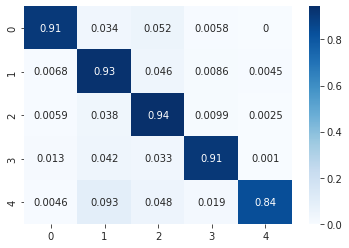

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = class_list)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.heatmap(conf_mat,annot=True,cmap='Blues', fmt='.2g')

In [ ]:
class_list

['RIBOSOME', 'HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM']

In [ ]:
#Print F1 score metrics
print(classification_report(y_test, NB_pred, target_names = class_list))

                precision    recall  f1-score   support

      RIBOSOME       0.87      0.93      0.90      9501
     HYDROLASE       0.98      0.84      0.90      3261
   TRANSFERASE       0.96      0.91      0.93      7023
OXIDOREDUCTASE       0.98      0.91      0.94     12027
 IMMUNE SYSTEM       0.83      0.94      0.88      7663

      accuracy                           0.92     39475
     macro avg       0.92      0.91      0.91     39475
  weighted avg       0.92      0.92      0.92     39475



train-acc = 0.9300172265288544
test-acc = 0.9159721342621913


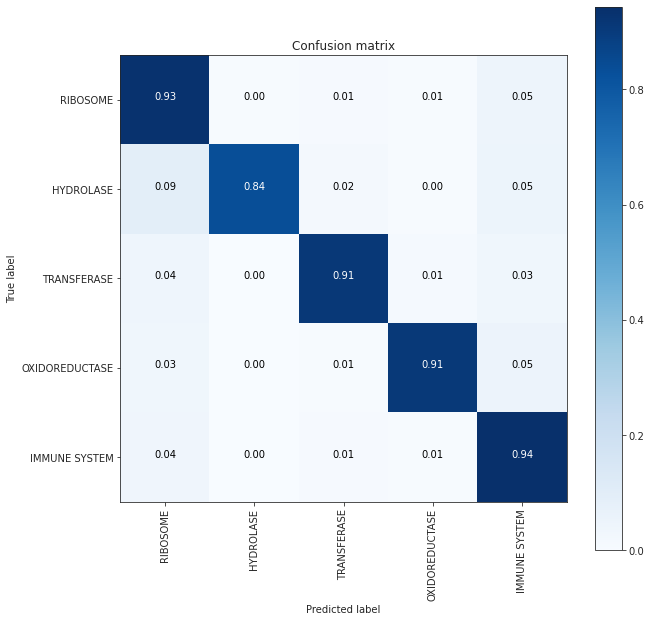

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

#for ML form X_train , y_pred, not for DL model
train_pred = model.predict(X_train_df)
test_pred = model.predict(X_test_df)
print("train-acc = " + str(accuracy_score(y_train, train_pred)))
print("test-acc = " + str(accuracy_score(y_test, test_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_list))
plt.xticks(tick_marks, class_list, rotation=90)
plt.yticks(tick_marks, class_list)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
    
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)
# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

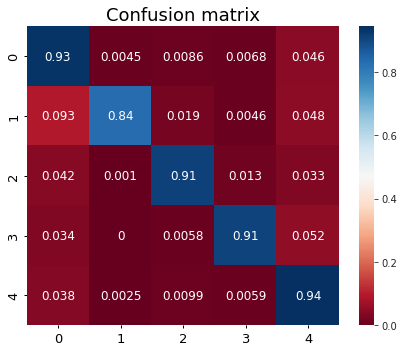

In [ ]:
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, cmap=colormap, annot=True, ax=ax, annot_kws={'fontsize':12})
kwargs={'length':3, 'width':1, 'colors':'black','labelsize':13}
ax.tick_params(**kwargs)
ax.tick_params(**kwargs,axis='x')
plt.title('Confusion matrix', color='black', fontsize=18)

plt.tight_layout()
plt.show()

### 儲存模型權重

#### 使用pickle

In [ ]:
## 儲存模型為pickle檔案
import pickle

filename = 'n-gram_ML_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
## 載入模型
model = pickle.load(open(filename, 'rb'))

#### 使用joblib

In [ ]:
## 儲存模型為joblib檔案
from joblib import dump, load
dump(model, 'n-gram_ML_model.joblib')

In [ ]:
## 載入模型
model = load('n-gram_ML_model.joblib')